# **Imports and Load Dependences**


In [1]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 6.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to remove special characters
from unidecode import unidecode

my_palette = sns.diverging_palette(230, 20, as_cmap=False)
sns.set_theme(style="ticks", palette=my_palette)

# **Load Datasets**

In [3]:
#@title Download Datasets from GDrive

# ESC FREQ 1
!gdown 1IpQuBoxR79tHk8IIAZzwFWtUjzSLr6uZ

!gdown 1hkzJTRxUQKvyqrw30rIpmrA1ZoiVd1oJ

Downloading...
From: https://drive.google.com/uc?id=1IpQuBoxR79tHk8IIAZzwFWtUjzSLr6uZ
To: /content/RAIS_ESC_FREQ.csv
100% 315k/315k [00:00<00:00, 8.66MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hkzJTRxUQKvyqrw30rIpmrA1ZoiVd1oJ
To: /content/results_scrapper_PCDII.csv
100% 698k/698k [00:00<00:00, 8.42MB/s]


In [4]:
df = pd.read_csv('RAIS_ESC_FREQ.csv', encoding='ISO-8859-1', sep=';')
cities_df = pd.read_csv('results_scrapper_PCDII.csv', index_col=0)

# **Pre-Processing**

## **ESC FREQ**

In [5]:
#@title Show attributes types and evaluate the existence of NaN values in each feature
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Município               5570 non-null   object
 1   Analfabeto              5570 non-null   int64 
 2   Até 5 Incompleto        5570 non-null   int64 
 3   5 Completo Fundamental  5570 non-null   int64 
 4   6 a 9 Fundamental       5570 non-null   int64 
 5   Fundamental Completo    5570 non-null   int64 
 6   Médio Incompleto        5570 non-null   int64 
 7   Médio Completo          5570 non-null   int64 
 8   Superior Incompleto     5570 non-null   int64 
 9   Superior Completo       5570 non-null   int64 
 10  Mestrado                5570 non-null   int64 
 11  Doutorado               5570 non-null   int64 
 12  Total                   5570 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 565.8+ KB


In [6]:
#@title Describe dataset with summary measures
#@markdown The idea is to evaluate the existence of different scales beetwen the features
#@markdown - Presence of outliers or influence of larger cities?
df.describe()

,Analfabeto,Até 5 Incompleto,5 Completo Fundamental,6 a 9 Fundamental,Fundamental Completo,Médio Incompleto,Médio Completo,Superior Incompleto,Superior Completo,Mestrado,Doutorado,Total
count,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000,5.570000e+03,5570.000000,5.570000e+03,5570.000000,5570.000000,5.570000e+03
mean,33.735368,186.564632,159.642011,371.358887,659.573250,528.114542,5.030234e+03,393.557630,2.004461e+03,73.460323,36.656553,9.477368e+03
std,204.527925,1120.172770,1040.744498,2513.741071,5314.783667,3866.283919,4.350722e+04,4601.771841,2.672484e+04,908.239645,444.490866,8.946540e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000e+00,0.000000,1.000000e+00,0.000000,0.000000,2.000000e+01
25%,2.000000,16.000000,14.000000,26.000000,46.000000,27.000000,2.820000e+02,12.000000,1.200000e+02,0.000000,0.000000,6.030000e+02
50%,6.000000,43.000000,38.000000,67.000000,110.000000,75.000000,6.685000e+02,31.000000,2.440000e+02,1.000000,0.000000,1.334000e+03
75%,20.000000,131.000000,112.000000,221.750000,336.000000,267.750000,1.927750e+03,103.000000,6.010000e+02,6.000000,1.000000,3.769750e+03
max,12327.000000,55847.000000,58675.000000,142530.000000,301506.000000,226011.000000,2.567290e+06,279764.000000,1.691331e+06,40875.000000,20490.000000,5.390446e+06


In [7]:
#@title View dataset struct
df.head()

,Município,Analfabeto,Até 5 Incompleto,5 Completo Fundamental,6 a 9 Fundamental,Fundamental Completo,Médio Incompleto,Médio Completo,Superior Incompleto,Superior Completo,Mestrado,Doutorado,Total
0,RO-ALTA FLORESTA D OESTE,10,133,103,129,156,183,1711,118,704,4,0,3251
1,RO-ARIQUEMES,83,441,347,767,795,1587,13397,798,3024,91,16,21346
2,RO-CABIXI,3,9,45,46,56,48,503,18,159,0,1,888
3,RO-CACOAL,50,501,282,681,1091,1367,11631,1088,3064,127,23,19905
4,RO-CEREJEIRAS,6,73,100,153,170,218,1627,106,455,27,0,2935


In [8]:
#@title Rename dataset keys
#@markdown Remove special characters from the features names

df = df.rename(columns={key: unidecode(key).replace(' ', '_') for key in df.keys()})

In [9]:
#@title Get state and city in dataframe
#@markdown Separate State and City from the Municipio attribute

def format_city(city: str):

  city_without_special_charac = unidecode(city)

  city_capitalize = city_without_special_charac.capitalize()

  return city_capitalize


state_and_city_frame = df['Municipio'].apply(lambda x: x.split('-'))

state = []
city = []

for row in state_and_city_frame:
  state.append(row[0])
  city.append(format_city(row[1]))

# Replace Municipio feature
df['Municipio'] = city

# Create Estato feature
df['Estado'] = state

# Reorder the columns
df = df[df.columns[-1:].tolist() + df.columns[:-1].tolist()]

## **Cities Frame**

In [10]:
# Get state in name feature
cities_df['Estado'] = cities_df['nome'].str.extract(r'\((.*?)\)')

# Get name of city in name feature
cities_df['Municipio'] = cities_df['nome'].str.extract(r'^(.*?)(?:\s\()')

# Standardizes the names of cities
cities_df['Municipio'] = cities_df['Municipio'].apply(lambda x : format_city(x))

# **Initial EDA**

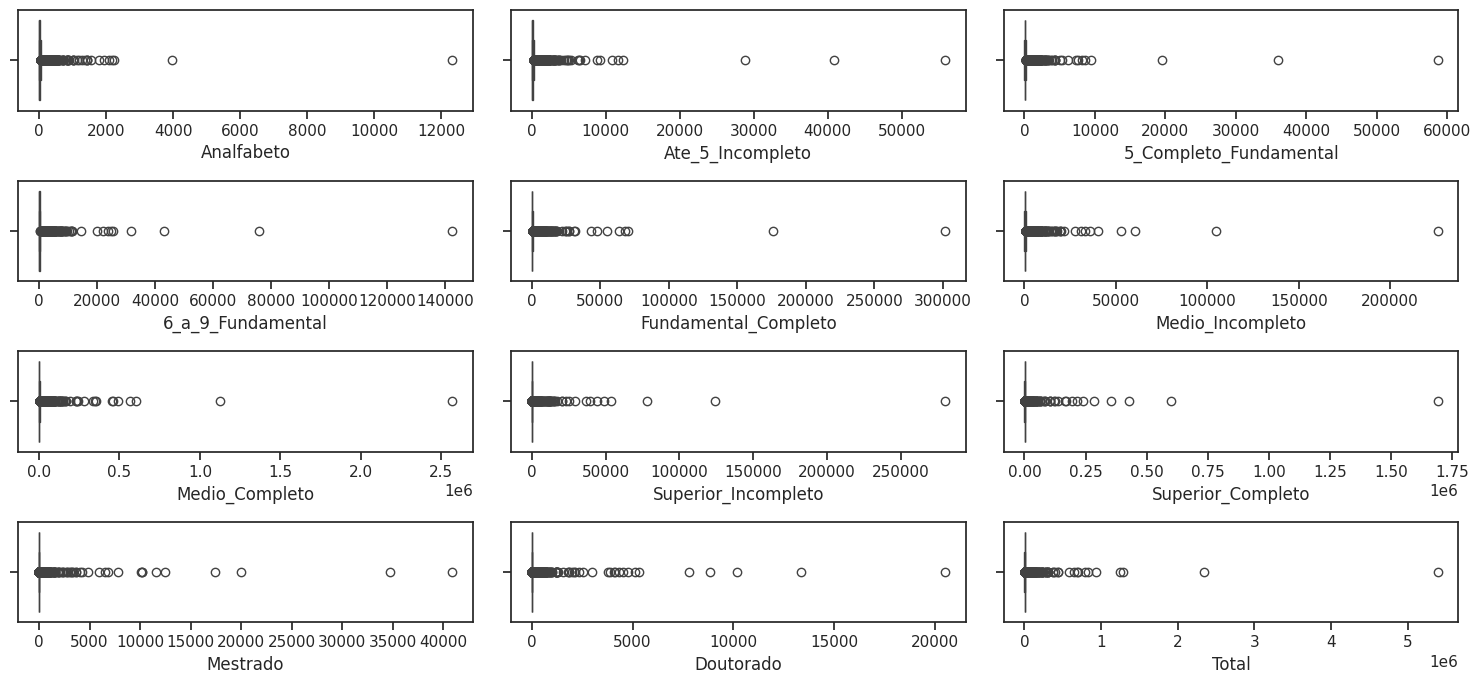

In [11]:
#@markdown Analyze outliers with a BoxPlot
numeric_features = list(df.keys())[2:]

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 7))
axs = axs.flatten()

for key, ax in zip(numeric_features, axs):
  sns.boxplot(df, x=key, ax=ax)

plt.tight_layout()
plt.show()

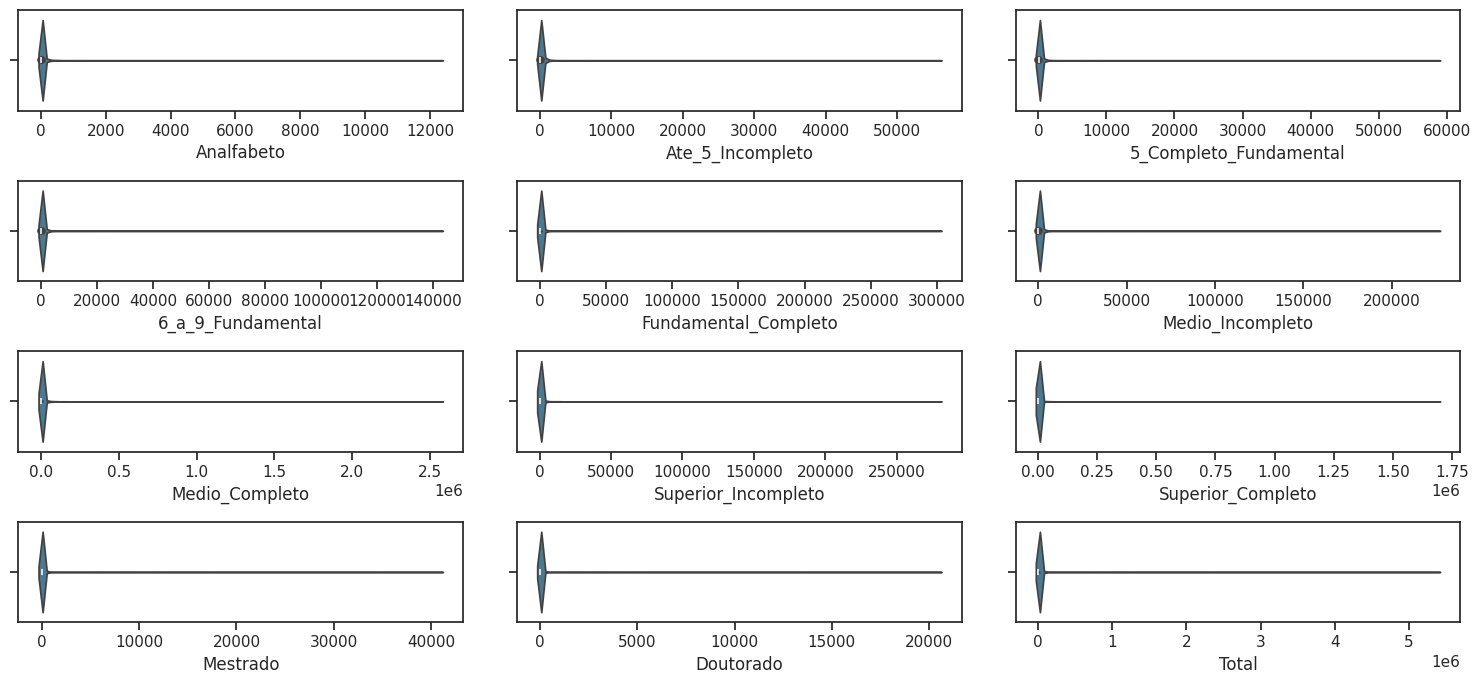

In [12]:
#@markdown Analize data distribution and outliers with a violin plot

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 7))
axs = axs.flatten()

for key, ax in zip(numeric_features, axs):
  sns.violinplot(df, x=key, ax=ax)

plt.tight_layout()
plt.show()

In [13]:
#@title ## Create new dataset without outliers
def remove_outliers_iqr(df: pd.DataFrame):
    # Compute Quantilies
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Compute IQR
    IQR = Q3 - Q1

    # Define upper and lower limits
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Apply filter in dataset
    df_filtered = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

    return df_filtered

df_without_outliers = remove_outliers_iqr(df.iloc[:,2:])

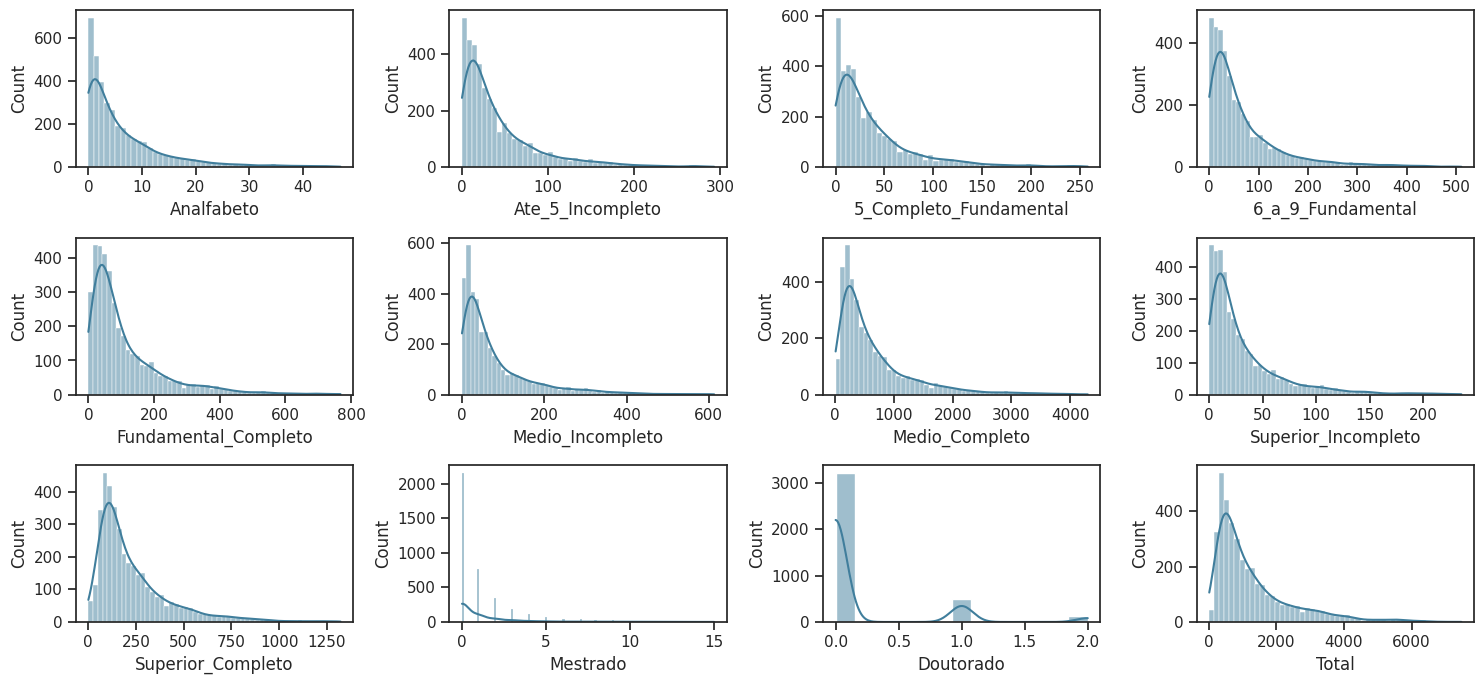

In [ ]:
#@markdown Analyze the data distribution with a histogram plot
#@markdown - We can see distrubrion forms like Gamma distribution

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 7))
axs = axs.flatten()

for key, ax in zip(numeric_features, axs):
  sns.histplot(df_without_outliers, x=key, ax=ax, kde=True)

plt.tight_layout()
plt.show()

In [14]:
#@title ## Create new dataframe to analyze correlation beetwen features and population size
new_df = pd.merge(df, cities_df, on=['Estado', 'Municipio'])
new_df = new_df.drop(columns=['codigo', 'nome', 'latitude','longitude', 'tag',
                              'PIB per capita do municipio', 'PIB Serviços',
                              'PIB Industria', 'PIB Adminstração Publica',
                              'PIB Agropecuária', 'Nivel Sociocultural',
                              'Nivel Capacidades Institucionais', 'Nivel Meio Ambiente'])

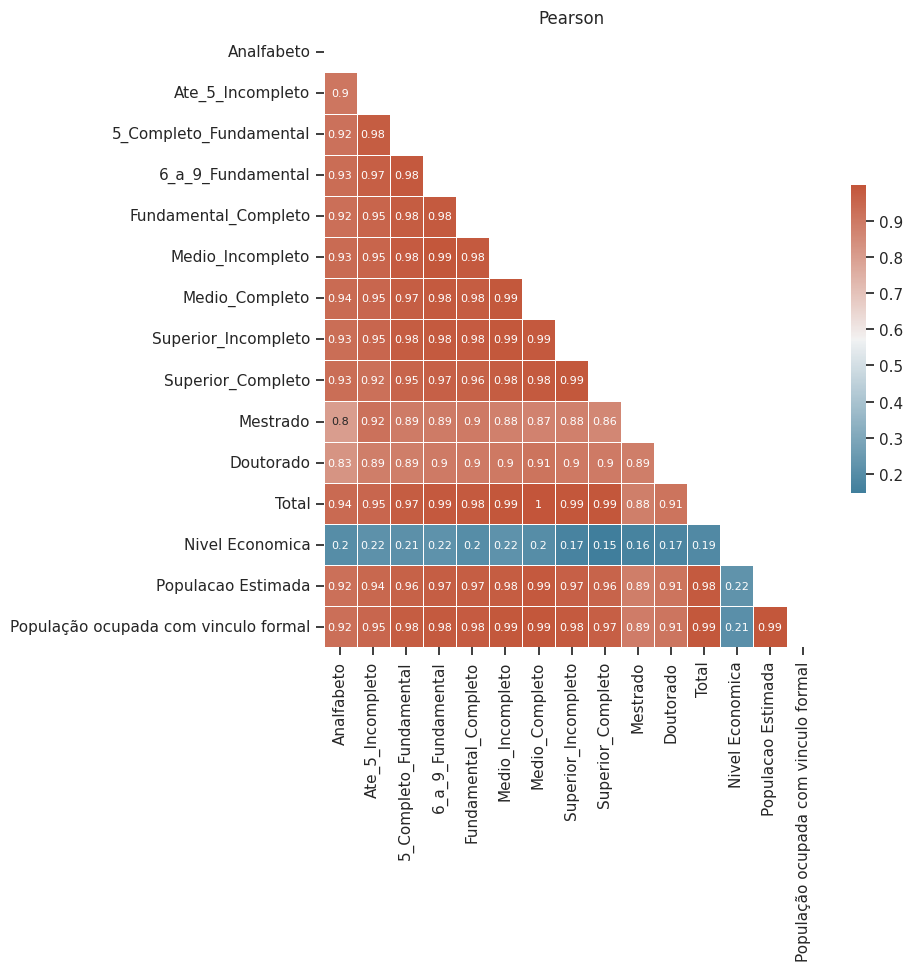

In [15]:
#@markdown Pearson Correlation

plt.figure(figsize=(8, 8))

corr_method = 'pearson'

corr = new_df.iloc[:, 2:].corr(method=corr_method)
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr,
            mask=mask,
            linewidths=.5,
            cbar_kws={"shrink": .5},
            cmap=cmap,
            annot=True,
            annot_kws={"size": 8})

plt.title(corr_method.capitalize())

plt.show()

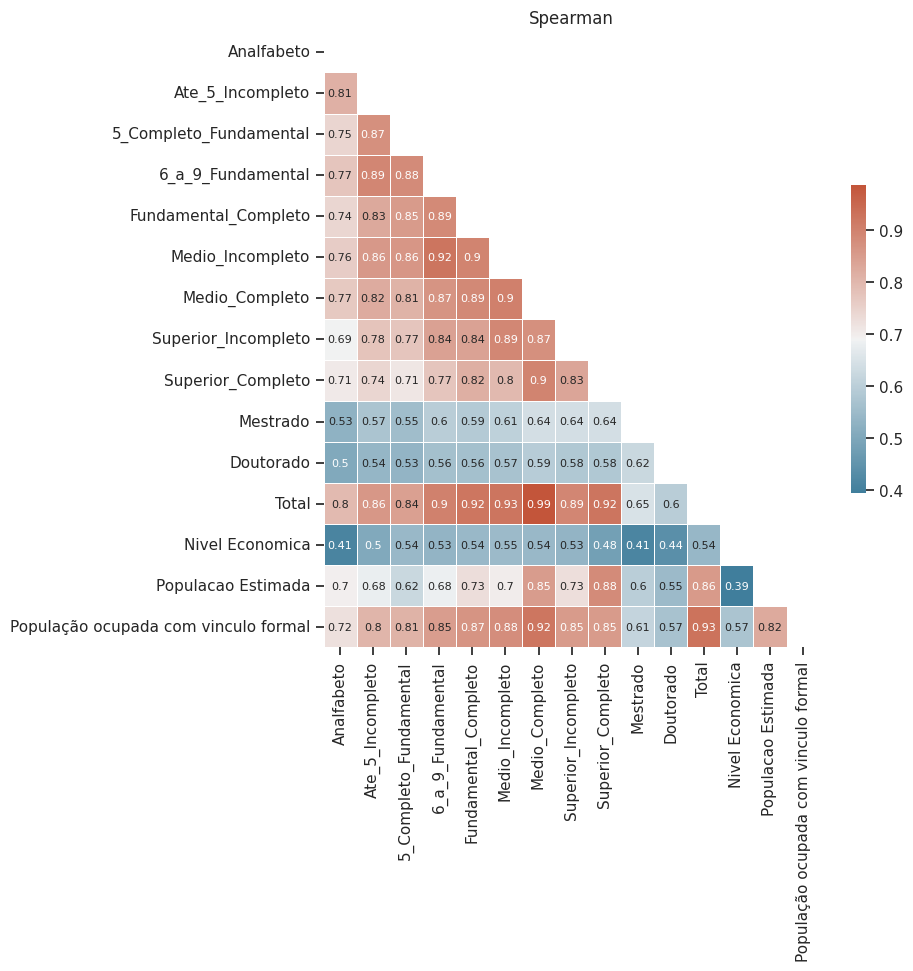

In [ ]:
#@markdown Spearman Correlation

plt.figure(figsize=(8, 8))

corr_method = 'spearman'

corr = new_df.iloc[:, 2:].corr(method=corr_method)
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr,
            mask=mask,
            linewidths=.5,
            cbar_kws={"shrink": .5},
            cmap=cmap,
            annot=True,
            annot_kws={"size": 8})

plt.title(corr_method.capitalize())

plt.show()

## **Creating Groups fom Quartiles**

Criar grupos a partir dos quantils da variavel total, que é a soma de todas as outras variaveis

In [16]:
num_quantiles = 4 #@param
initial_percentage_of_the_quantilies = 1 / (num_quantiles + 1)
percentage_of_the_quantilies = np.arange(0, 1, initial_percentage_of_the_quantilies)[1:]
print(f'Quantis Observados', percentage_of_the_quantilies)

VALUES_OF_THE_QUANTILES = df['Total'].quantile(q=percentage_of_the_quantilies).to_numpy()
print(f'Valores de limiar usados', VALUES_OF_THE_QUANTILES)

def define_quantile_group(x):

  for group_index, threshold in enumerate(VALUES_OF_THE_QUANTILES):
    if x < threshold:
      return group_index

  return group_index + 1

df['Group'] = df['Total'].apply(lambda x : define_quantile_group(x))

Quantis Observados [0.2 0.4 0.6 0.8]
Valores de limiar usados [ 516.   971.6 1923.  5162.8]


Atributos e Indice
{'5_Completo_Fundamental': 4,
 '6_a_9_Fundamental': 5,
 'Analfabeto': 2,
 'Ate_5_Incompleto': 3,
 'Doutorado': 12,
 'Estado': 0,
 'Fundamental_Completo': 6,
 'Group': 14,
 'Medio_Completo': 8,
 'Medio_Incompleto': 7,
 'Mestrado': 11,
 'Municipio': 1,
 'Superior_Completo': 10,
 'Superior_Incompleto': 9,
 'Total': 13}


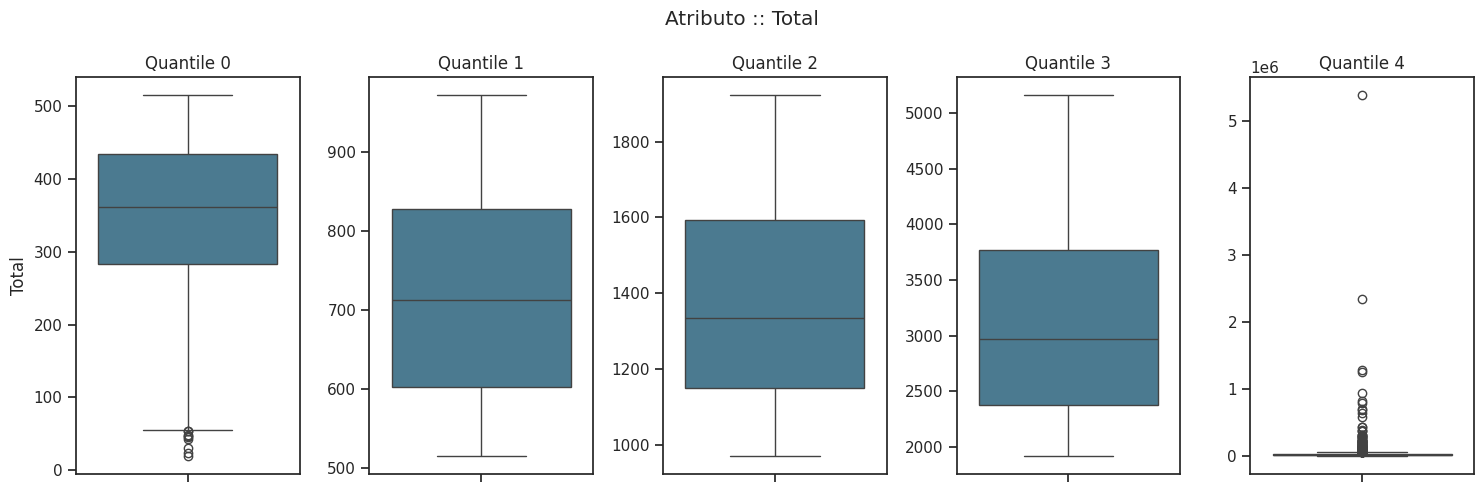

In [17]:
#@markdown Analyze outliers with a BoxPlot
from pprint import pprint

feature_index = 13 #@param

key = list(df.keys())[feature_index]
dict_feature_name_idx = {feature_name: idx for idx, feature_name in enumerate(df.keys())}

print(f'Atributos e Indice')
pprint(dict_feature_name_idx)

fig, axs = plt.subplots(ncols=num_quantiles + 1, figsize=(15, 5))

for group_index in range(num_quantiles + 1):
  sns.boxplot(df[df['Group'] == group_index], y=key, ax=axs[group_index])
  axs[group_index].set_title(f'Quantile {group_index}')

  if group_index > 0:
    axs[group_index].set_ylabel('')

treated_key = key.capitalize().replace('_', ' ')
plt.suptitle(f'Atributo :: {treated_key}')
plt.tight_layout()
plt.show()

## **Remove selected outliers $\to$ "Metropolis"**

In [18]:
df[['Municipio', 'Total']].sort_values(by=['Total'], ascending=False).head(20)

,Municipio,Total
3829,Sao paulo,5390446
3242,Rio de janeiro,2339294
2309,Belo horizonte,1287288
5569,Brasilia,1250053
4005,Curitiba,935984
949,Fortaleza,828827
2162,Salvador,788195
1596,Recife,703180
4931,Porto alegre,684076
5417,Goiania,643009


In [19]:
#@title Remove cities with feature Total bigger 350.000
th = 350_000 #@param
df_without_bigger_cities = df[df['Total'] < th]
df_without_bigger_cities = df_without_bigger_cities.reset_index().drop(columns=['index'])

#@markdown Create Quantilies Groups
num_quantiles = 4 #@param
initial_percentage_of_the_quantilies = 1 / (num_quantiles + 1)
percentage_of_the_quantilies = np.arange(0, 1, initial_percentage_of_the_quantilies)[1:]
print(f'Quantis Observados', percentage_of_the_quantilies)

VALUES_OF_THE_QUANTILES = df_without_bigger_cities['Total'].quantile(q=percentage_of_the_quantilies).to_numpy()
print(f'Valores de limiar usados', VALUES_OF_THE_QUANTILES)

def define_quantile_group(x):

  for group_index, threshold in enumerate(VALUES_OF_THE_QUANTILES):
    if x < threshold:
      return group_index

  return group_index + 1

df_without_bigger_cities['Group'] = df_without_bigger_cities['Total'].apply(lambda x : define_quantile_group(x))

Quantis Observados [0.2 0.4 0.6 0.8]
Valores de limiar usados [ 515.   967.4 1912.8 5095. ]


Atributos e Indice
{'5_Completo_Fundamental': 4,
 '6_a_9_Fundamental': 5,
 'Analfabeto': 2,
 'Ate_5_Incompleto': 3,
 'Doutorado': 12,
 'Estado': 0,
 'Fundamental_Completo': 6,
 'Group': 14,
 'Medio_Completo': 8,
 'Medio_Incompleto': 7,
 'Mestrado': 11,
 'Municipio': 1,
 'Superior_Completo': 10,
 'Superior_Incompleto': 9,
 'Total': 13}


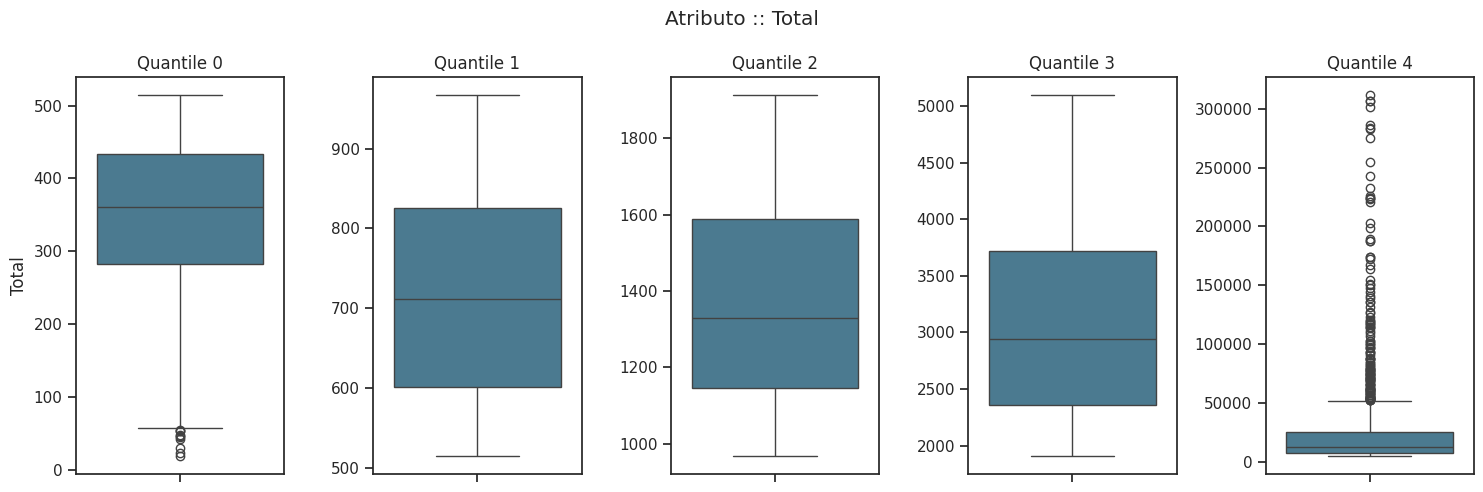

In [20]:
#@markdown Analyze outliers with a BoxPlot
from pprint import pprint

feature_index = 13 #@param

key = list(df_without_bigger_cities.keys())[feature_index]
dict_feature_name_idx = {feature_name: idx for idx, feature_name in enumerate(df_without_bigger_cities.keys())}

print(f'Atributos e Indice')
pprint(dict_feature_name_idx)

fig, axs = plt.subplots(ncols=num_quantiles + 1, figsize=(15, 5))

for group_index in range(num_quantiles + 1):
  sns.boxplot(df_without_bigger_cities[df_without_bigger_cities['Group'] == group_index], y=key, ax=axs[group_index])
  axs[group_index].set_title(f'Quantile {group_index}')

  if group_index > 0:
    axs[group_index].set_ylabel('')

treated_key = key.capitalize().replace('_', ' ')
plt.suptitle(f'Atributo :: {treated_key}')
plt.tight_layout()
plt.show()

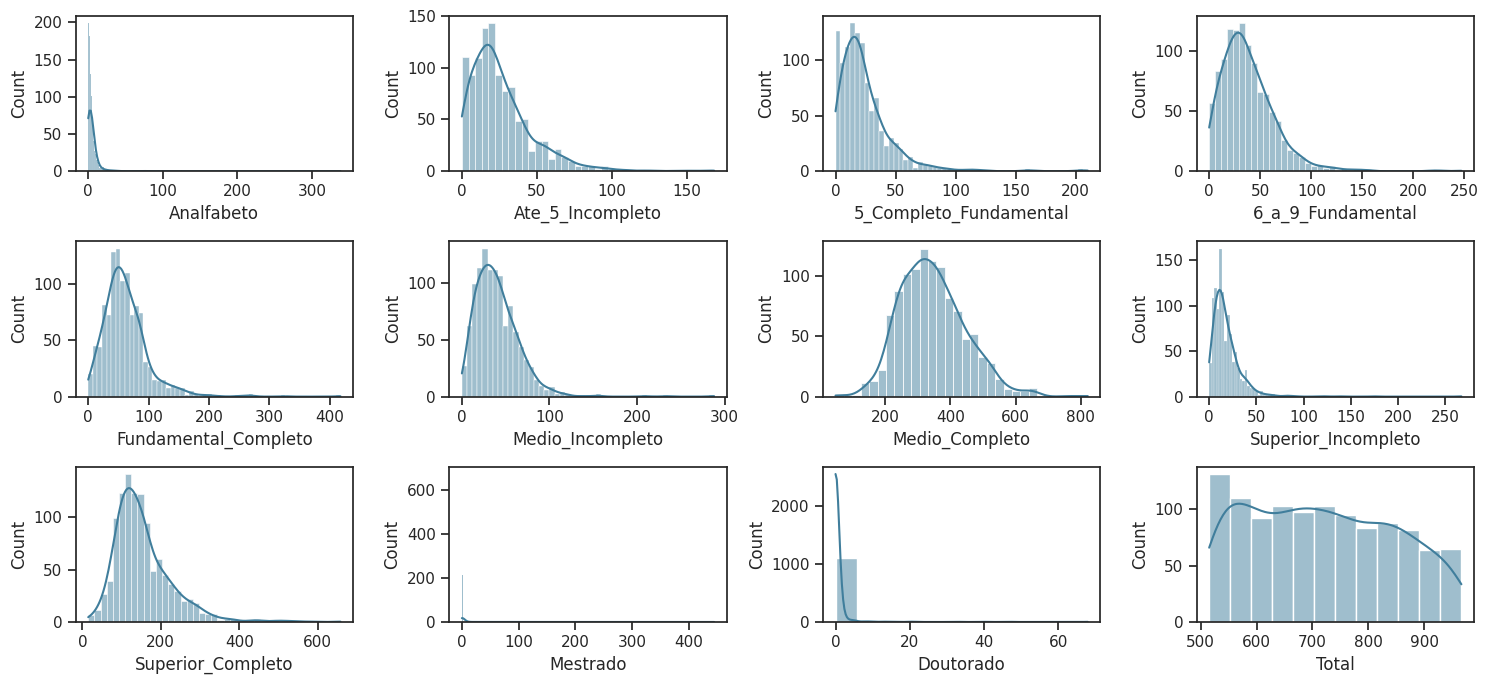

In [21]:
#@markdown Analyze the data distribution with a histogram plot
#@markdown - We can see distrubrion forms like Gamma distribution

group = 1 #@param

numeric_features = list(df.keys())[2:]

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 7))
axs = axs.flatten()

for key, ax in zip(numeric_features, axs):
  sns.histplot(df_without_bigger_cities[df_without_bigger_cities['Group'] == group], x=key, ax=ax, kde=True)

plt.tight_layout()
plt.show()

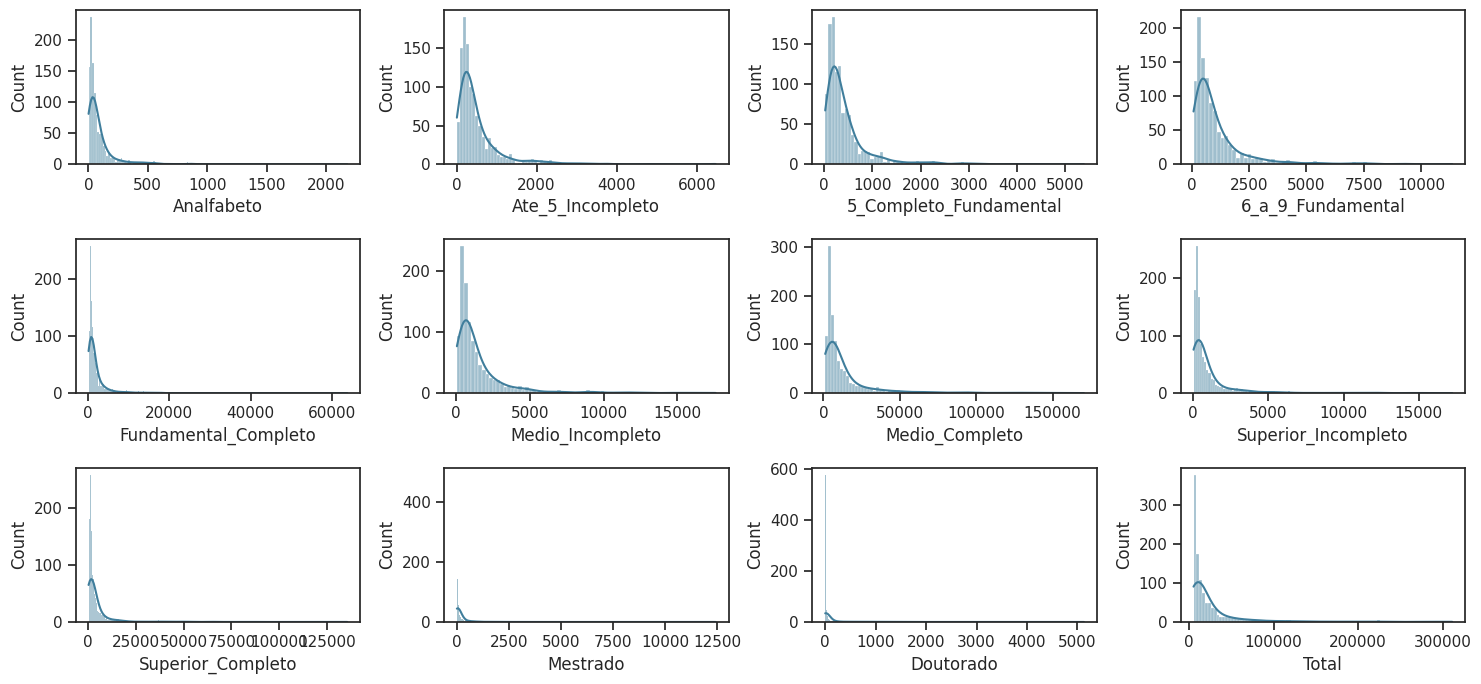

In [22]:
#@markdown Analyze the data distribution with a histogram plot
#@markdown - We can see distrubrion forms like Gamma distribution

group = 4 #@param

numeric_features = list(df.keys())[2:]

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 7))
axs = axs.flatten()

for key, ax in zip(numeric_features, axs):
  sns.histplot(df_without_bigger_cities[df_without_bigger_cities['Group'] == group], x=key, ax=ax, kde=True)

plt.tight_layout()
plt.show()

## **Creating Clusters with Kmeans and DBSCAN Algorithm**

In [23]:
#@title Imports

# Cluster the data
from sklearn.cluster import KMeans

# Score to evaluate cluster
from sklearn.metrics import silhouette_score

# Pre-processing dataframe
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from tqdm.notebook import trange, tqdm

In [24]:
#@title Processing Dataset
X = df.copy()
X = X.drop(columns=['Estado','Municipio','Group','Total'])

# Scaler dataset
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

## **K-means**

  0%|          | 0/19 [00:00<?, ?it/s]

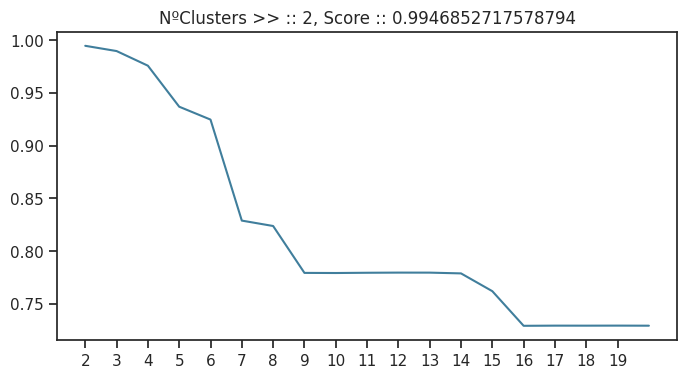


Contagem das distribuições das labels ::  [5568    2]


In [25]:
#@title Create Clusters
num_min_clusters = 2 #@param
num_max_clusters = 20 #@param

list_with_num_of_clusters = trange(num_min_clusters, num_max_clusters + 1)
silhuette_results = []

for num_clusters in list_with_num_of_clusters:
  # Instancead Kmeans object
  kmeans = KMeans(init='k-means++',
                  n_clusters=num_clusters,
                  random_state=0,
                  n_init="auto")

  kmeans_labels = kmeans.fit_predict(X)

  # Compute slhouete score
  score = silhouette_score(X, kmeans_labels)

  # Store sore
  silhuette_results.append(score)


n_clusters_chosen = range(num_min_clusters, num_max_clusters)[np.argmax(silhuette_results)]

# Plot scores
plt.figure(figsize=(8, 4))

sns.lineplot(x=list_with_num_of_clusters, y=silhuette_results)

plt.xticks(range(num_min_clusters, num_max_clusters))

plt.title(f'NºClusters >> :: {n_clusters_chosen}, Score :: {np.max(silhuette_results)}')

plt.show()


# Create Kmeans labels

kmeans = KMeans(init='k-means++',
                n_clusters=n_clusters_chosen,
                random_state=0,
                n_init="auto")

kmeans_labels = kmeans.fit_predict(X)

_, count_of_labels = np.unique(kmeans_labels, return_counts=True)

print(f'\nContagem das distribuições das labels :: ', count_of_labels)

# **Region Analyze**

In [26]:
regions = {
    'Norte': ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO'],
    'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
    'CentroOeste': ['DF', 'GO', 'MT', 'MS'],
    'Sudeste': ['ES', 'MG', 'RJ', 'SP'],
    'Sul': ['PR', 'RS', 'SC']
}

inverted_regions = {estado: region for region, estados in regions.items() for estado in estados}

df['Regiao'] = df['Estado'].map(inverted_regions)

In [31]:
df[['Municipio', 'Regiao', 'Total']].sort_values(by=['Total','Regiao'], ascending=False).head(20)

,Municipio,Regiao,Total
3829,Sao paulo,Sudeste,5390446
3242,Rio de janeiro,Sudeste,2339294
2309,Belo horizonte,Sudeste,1287288
5569,Brasilia,CentroOeste,1250053
4005,Curitiba,Sul,935984
949,Fortaleza,Nordeste,828827
2162,Salvador,Nordeste,788195
1596,Recife,Nordeste,703180
4931,Porto alegre,Sul,684076
5417,Goiania,CentroOeste,643009


In [27]:
df['Regiao'].value_counts()

,count
Regiao,
Nordeste,1794
Sudeste,1668
Sul,1190
CentroOeste,467
Norte,450


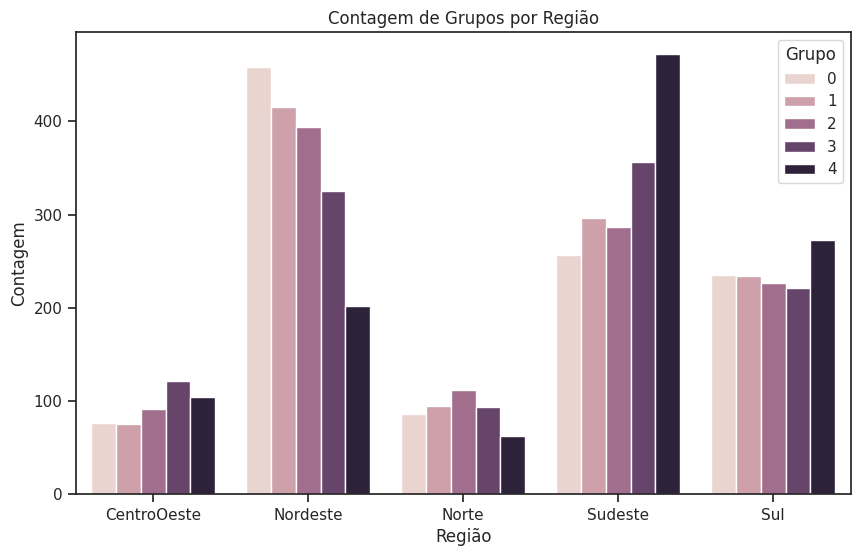

In [28]:
count_per_region_and_group = df.groupby(['Regiao', 'Group']).size().reset_index(name='Contagem')

plt.figure(figsize=(10, 6))
sns.barplot( data=count_per_region_and_group, x='Regiao', y='Contagem', hue='Group')
plt.title('Contagem de Grupos por Região')
plt.ylabel('Contagem')
plt.xlabel('Região')
plt.legend(title='Grupo')
plt.show()